In [2]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12, 10))

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [3]:
# Cargar el dataset
file_path = './forestfires.csv'
df = pd.read_csv(file_path)

In [4]:
df.drop_duplicates(inplace = True)
df[df.duplicated()]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area


In [5]:
# Crear un diccionario para convertir los nombres de los meses a números
month_to_number = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Convertir los nombres de los meses a números
df['month'] = df['month'].map(month_to_number)

In [6]:
# Crear un diccionario para convertir los nombres de los meses a números
# Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday
day_to_number = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6,
    'sun': 7
}

# Convertir los nombres de los meses a números
df['day'] = df['day'].map(day_to_number)

In [7]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Text(0.5, 1.0, 'Correlation Heatmap')

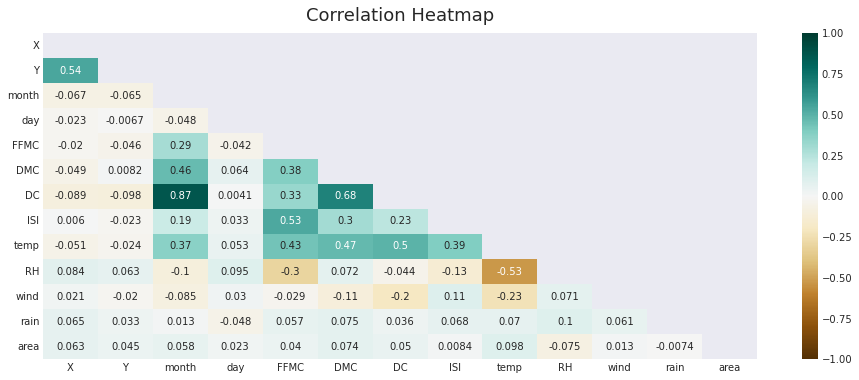

In [8]:
# correlation heatmap between features 
plt.figure(figsize=(16, 6))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 18}, pad = 12)


In [11]:
# Categorizar FFMC
def categorize_ffmc(value):
    if value <= 30:
        return 'Bajo'
    elif value <= 60:
        return 'Moderado'
    elif value <= 80:
        return 'Alto'
    else:
        return 'Muy Alto'

# Categorizar DMC
def categorize_dmc(value):
    if value <= 10:
        return 'Bajo'
    elif value <= 20:
        return 'Moderado'
    elif value <= 30:
        return 'Alto'
    else:
        return 'Muy Alto'

# Categorizar DC
def categorize_dc(value):
    if value <= 100:
        return 'Bajo'
    elif value <= 200:
        return 'Moderado'
    elif value <= 300:
        return 'Alto'
    else:
        return 'Muy Alto'

# Categorizar ISI
def categorize_isi(value):
    if value <= 3:
        return 'Bajo'
    elif value <= 6:
        return 'Moderado'
    elif value <= 12:
        return 'Alto'
    else:
        return 'Muy Alto'
    
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

In [12]:
# Aplicar las funciones de categorización
df['FFMC_category'] = df['FFMC'].apply(categorize_ffmc)
df['DMC_category'] = df['DMC'].apply(categorize_dmc)
df['DC_category'] = df['DC'].apply(categorize_dc)
df['ISI_category'] = df['ISI'].apply(categorize_isi)
df['area_category'] = df['area'].apply(area_cat)

# Verificar las primeras filas del dataframe actualizado
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,FFMC_category,DMC_category,DC_category,ISI_category,area_category
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,Muy Alto,Alto,Bajo,Moderado,No damage
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,Muy Alto,Muy Alto,Muy Alto,Alto,No damage
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,Muy Alto,Muy Alto,Muy Alto,Alto,No damage
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,Muy Alto,Muy Alto,Bajo,Alto,No damage
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,Muy Alto,Muy Alto,Moderado,Alto,No damage
